# 1. Import the libraries and Dataset


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

print(data)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

# 2. Display the Top 5 Rows of the Dataset

In [55]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 3. check the last 5 rows of the Dataset

In [56]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# 4.Find the Shape of Our Dataset

In [57]:
data.shape

(100000, 9)

# 5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# 6. Check Null Values In The Dataset

In [59]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# 7. Check For Duplicate Data and Drop Them

In [60]:
data_duplicates = data.duplicated().any()
print(data_duplicates)

True


In [61]:
data = data.drop_duplicates()
duplicates_after = data.duplicated().sum()
print(f"Number of duplicated after removal: {duplicates_after}")

Number of duplicated after removal: 0


In [62]:
data.shape

(96146, 9)

# 8.Get Overall Statistics About The Dataset

In [63]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# 9. Draw Correlation Matrix

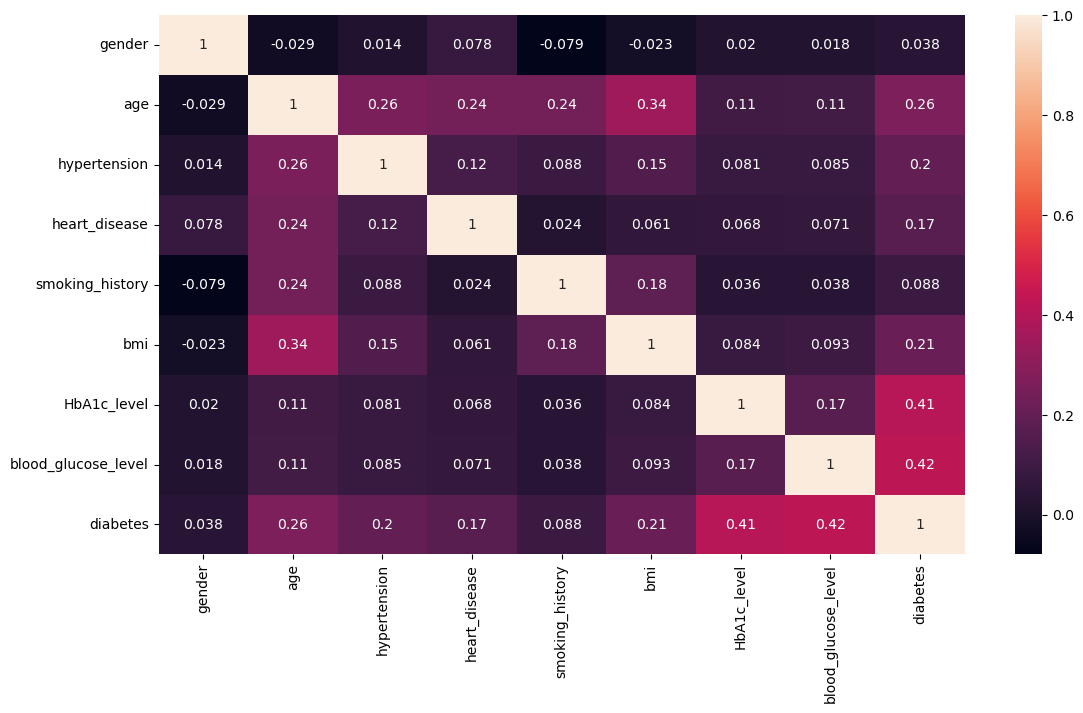

In [64]:
# Convert categorical columns to numeric
data['gender'] = data['gender'].astype('category').cat.codes
data['smoking_history'] = data['smoking_history'].astype('category').cat.codes

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [65]:
# The correlation matrix helps to understand the relationship between the different factors 
#such as age,bmi,smoking_history,blood glucose levels, gender,hypertension with diabeties
# Here in the data variables like glucose levels,bmi,age and hba1c levels are showing strong positive correlation 


# 10.Proportion of Diabetic and Non-Diabetic Individuals

In [66]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [67]:
diabetic_counts = data['diabetes'].value_counts()
diabetic_counts 

diabetes
0    87664
1     8482
Name: count, dtype: int64

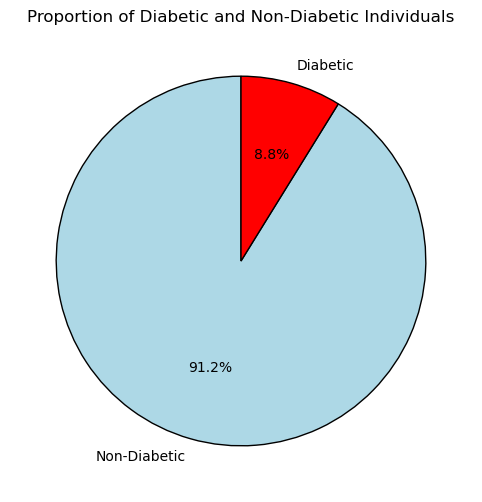

In [68]:
plt.figure(figsize=(8, 6))
labels = ['Non-Diabetic', 'Diabetic']
plt.pie(diabetic_counts, labels=labels, autopct='%.1f%%', startangle=90, colors=['lightblue', 'red'], wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Diabetic and Non-Diabetic Individuals')
plt.show()


In [16]:
# The pie chart represents the proportion of diabetic and non-diabetic individuals in this dataset, 
# The larger light blue represents non-diabetic upto 91.2% and diabetic individuals are 8.8% of the total population.

# 11. Find count of Males and Females in Dataset

In [69]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [70]:
gender_counts = data['gender'].value_counts()
print(gender_counts)


gender
0    56161
1    39967
2       18
Name: count, dtype: int64


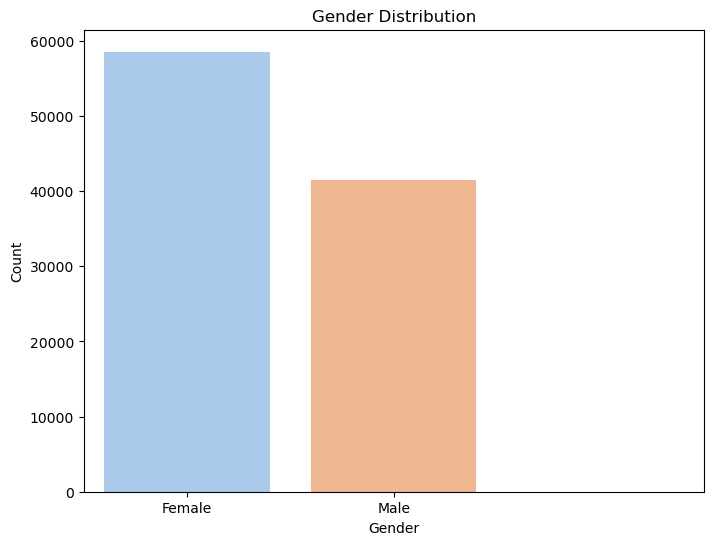

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='gender', data=data, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0,1],['Female','Male'])
plt.title('Gender Distribution')
plt.show()


In [72]:
# From the count plot it's clear that more number of peoples are female and less are male.

# 12. Gender Distribution According to The Target Variable

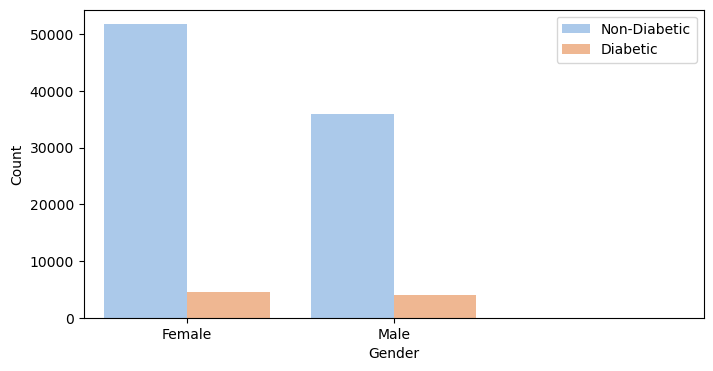

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', hue = 'diabetes', data=data, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Non-Diabetic','Diabetic'])
plt.xticks([0,1],['Female','Male'])
plt.show()

In [74]:
#from the count plot, there are more female for diabetic then men

# 13. Check Age Distribution In The Dataset

In [75]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

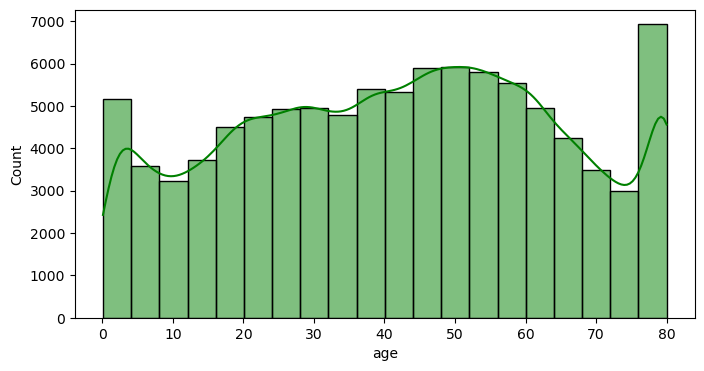

In [76]:
plt.figure(figsize=(8,4))
sns.histplot(data['age'],bins=20,kde = True, color = "green")
plt.show()

In [77]:
#  from this plot we can see that most of the people in this study aged between 40-80

# 14. Smoking History and Diabeties Distribution

In [78]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [79]:
Smoking_history = data['smoking_history'].value_counts() 
labels = ([0,1,2,3,4,5],['No Info','current','ever','former','never','not current'])
print(Smoking_history)

smoking_history
4    34398
0    32887
3     9299
1     9197
5     6367
2     3998
Name: count, dtype: int64


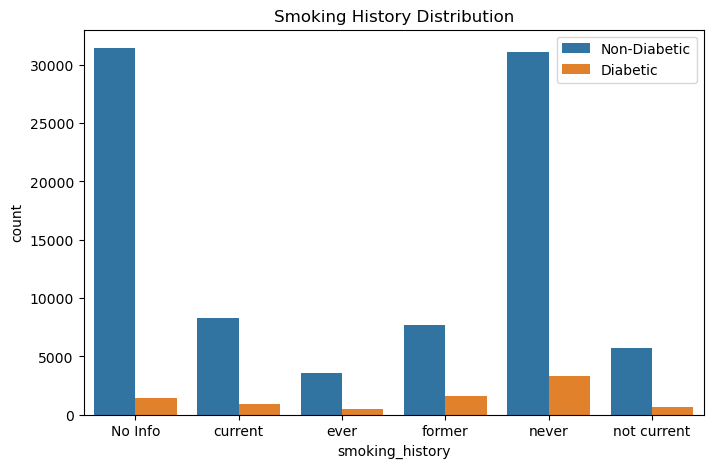

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data,hue='diabetes', x='smoking_history')
plt.xticks([0,1,2,3,4,5],['No Info','current','ever','former','never','not current'])
plt.legend(labels=['Non-Diabetic','Diabetic'])
plt.title("Smoking History Distribution")
plt.show()

In [81]:
# The bar chart displays the distibution of smoking history,
# the category of No Info and never has the highest non diabetic individuals 
# The category of current,ever,former,never and not current has the lower count with non diabetic 
# still more with diabetic individuals in each category

# 15 Mean BMI Comparison by Diabetes Status

In [82]:
#Group the data by diabetes status and calculate the mean BMI for each group:

mean_bmi = data.groupby('diabetes')['bmi'].mean().reset_index()

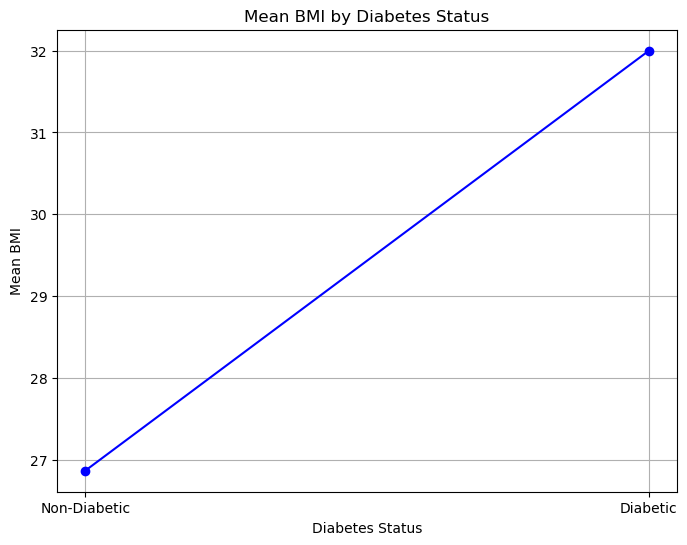

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(mean_bmi['diabetes'], mean_bmi['bmi'], marker='o', linestyle='-', color='b')
plt.xlabel('Diabetes Status')
plt.ylabel('Mean BMI')
plt.title('Mean BMI by Diabetes Status')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

In [84]:
# The graph highlights that, the individuals with diabetes have a higher BMI compared to those Non diabetic. 

# 16. Relationship between Age, BMI, and Diabetes Status

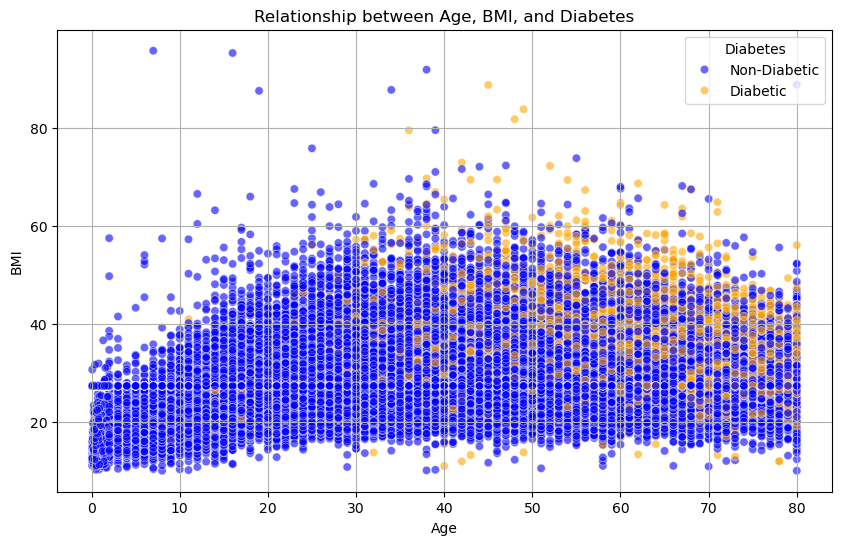

In [85]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(data=data, x='age', y='bmi', hue='diabetes',palette={0: 'blue', 1: 'orange'}, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('BMI')

plt.title('Relationship between Age, BMI, and Diabetes')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Non-Diabetic', 'Diabetic'], title='Diabetes')
plt.grid(True)
plt.show()


In [86]:
# The scatter plot shows the distribution of BMI across different ages for both diabetic and non diabetic individuals
# The Orange dots are more concentrated in the higher BMI range, indicating that higher BMI is asssociated with diabetes
# and the Blue dots are non diabetic are more spraed out across the BMI range
# In a conclusion, the individuals with higher BMI are more likely to be diabetic, regardless of age.

# 17. Hypertension Distribution

In [87]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [88]:
hypertension_counts = data['hypertension'].value_counts()
print(hypertension_counts)

hypertension
0    88685
1     7461
Name: count, dtype: int64


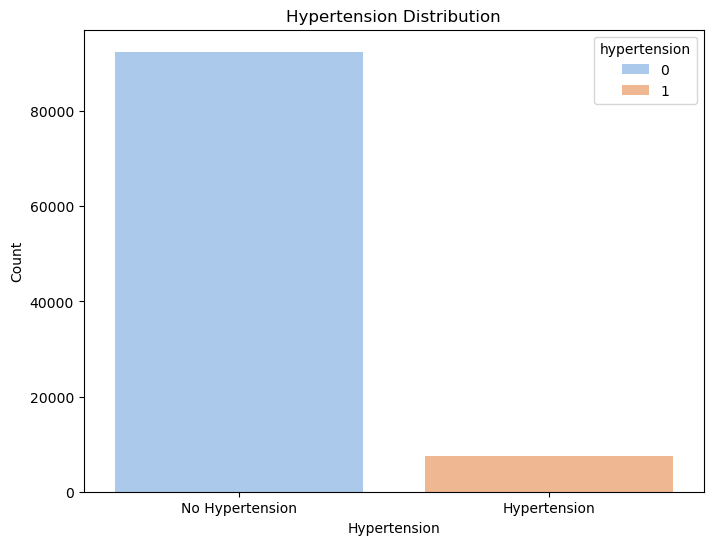

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='hypertension', data=data, palette='pastel', dodge=False)


plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()



# 18. Hypertension Distribution with Diabetes Status

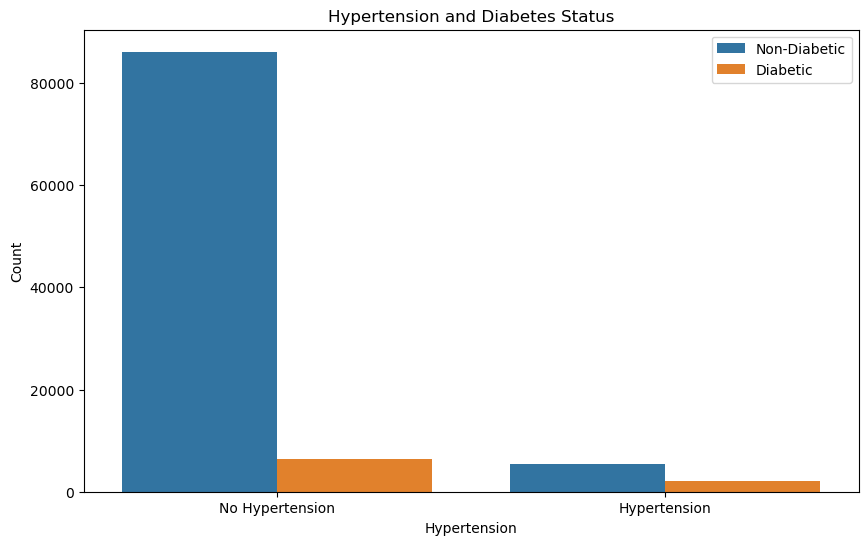

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=data)
plt.legend(labels=['Non-Diabetic', 'Diabetic'])
plt.title('Hypertension and Diabetes Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()

In [ ]:
# From the bar chart the majority of non-diabetic individuals don not have hypertension 
# and a smaller portion of non diabetic individuals have hypertension
# and also the noticeable count of diabetic individuals are without hypertension 
# but it is significantly lower than the count of diabetic individuals without hypertension.
# In a conclusion, The bar chart suggests that while hypertension is present in both diabetic and non-diabetic individuals, 
# and it is more prevalent among diabetic individuals.

# 19. Distribution of Blood glucose levels by Diabetes Status

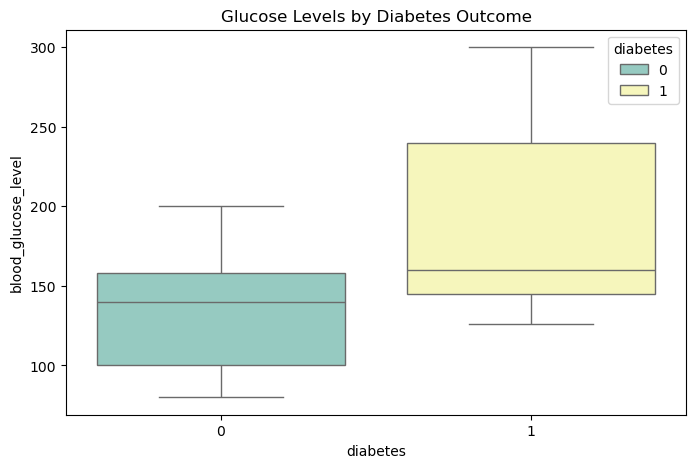

In [97]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='blood_glucose_level',hue='diabetes', data=data,palette = "Set3")
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

In [ ]:
# This box plot highlights the difference in blood glucose levels between individuals with and without diabetes. 
# Diabetic individuals tend to have higher blood glucose levels compared to non-diabetic individuals.

# 20. Distribution of HbA1c levels by Diabetes Status

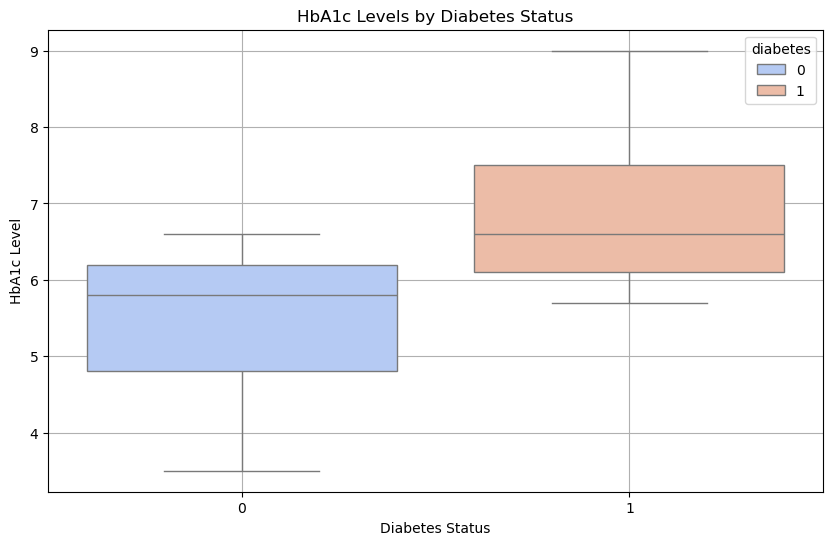

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data,hue= 'diabetes', palette='coolwarm')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Levels by Diabetes Status')
plt.grid(True)

plt.show()

In [ ]:
# This box plot highlights the difference in HbA1c levels between non-diabetic and diabetic individuals. 
# Diabetic individuals tend to have higher HbA1c levels compared to non-diabetic individuals. 
# The median HbA1c level for diabetic individuals is significantly higher, and the range of HbA1c levels is also broader.